In [70]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import psutil

In [72]:
# Function to measure execution time and accuracy
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    execution_time = time.time() - start_time
    accuracy = accuracy_score(y_test, predictions)
    return execution_time, accuracy

In [74]:
# Function to limit CPU cores and evaluate models
def perform_experiment(cpu_core_limits):
    results = {"cores": [], "logistic_time": [], "logistic_accuracy": [],
               "svm_time": [], "svm_accuracy": []}

In [76]:
# Create synthetic dataset for the experiment
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Define CPU core limits
cpu_core_limits = [1, 2, 4, 8]  # Example values, adjust as needed

# Initialize results dictionary
results = {"cores": [], "logistic_time": [], "logistic_accuracy": [],
           "svm_time": [], "svm_accuracy": []}

# Running the experiments for each core limit
for cores in cpu_core_limits:
    print(f"\nTesting with {cores} CPU cores...")
    os.environ["OMP_NUM_THREADS"] = str(cores)

    # Logistic Regression
    logistic_model = LogisticRegression(solver='liblinear', random_state=42)
    logistic_time, logistic_accuracy = evaluate_model(logistic_model, X_train, y_train, X_test, y_test)
    results["logistic_time"].append(logistic_time)
    results["logistic_accuracy"].append(logistic_accuracy)

    # Support Vector Machine
    svm_model = SVC(kernel='linear', random_state=42)
    svm_time, svm_accuracy = evaluate_model(svm_model, X_train, y_train, X_test, y_test)
    results["svm_time"].append(svm_time)
    results["svm_accuracy"].append(svm_accuracy)

    results["cores"].append(cores)
    print(f"Logistic Regression - Time: {logistic_time:.4f}s, Accuracy: {logistic_accuracy:.4f}")
    print(f"SVM - Time: {svm_time:.4f}s, Accuracy: {svm_accuracy:.4f}")


Testing with 1 CPU cores...
Logistic Regression - Time: 0.0129s, Accuracy: 0.8100
SVM - Time: 0.1663s, Accuracy: 0.7950

Testing with 2 CPU cores...
Logistic Regression - Time: 0.0000s, Accuracy: 0.8100
SVM - Time: 0.1505s, Accuracy: 0.7950

Testing with 4 CPU cores...
Logistic Regression - Time: 0.0000s, Accuracy: 0.8100
SVM - Time: 0.1418s, Accuracy: 0.7950

Testing with 8 CPU cores...
Logistic Regression - Time: 0.0023s, Accuracy: 0.8100
SVM - Time: 0.1401s, Accuracy: 0.7950



Testing with 1 CPU cores...
Logistic Regression - Time: 0.0083s, Accuracy: 0.8100
SVM - Time: 0.1770s, Accuracy: 0.7950

Testing with 2 CPU cores...
Logistic Regression - Time: 0.0075s, Accuracy: 0.8100
SVM - Time: 0.1121s, Accuracy: 0.7950

Testing with 4 CPU cores...
Logistic Regression - Time: 0.0000s, Accuracy: 0.8100
SVM - Time: 0.1375s, Accuracy: 0.7950

Testing with 8 CPU cores...
Logistic Regression - Time: 0.0000s, Accuracy: 0.8100
SVM - Time: 0.1363s, Accuracy: 0.7950


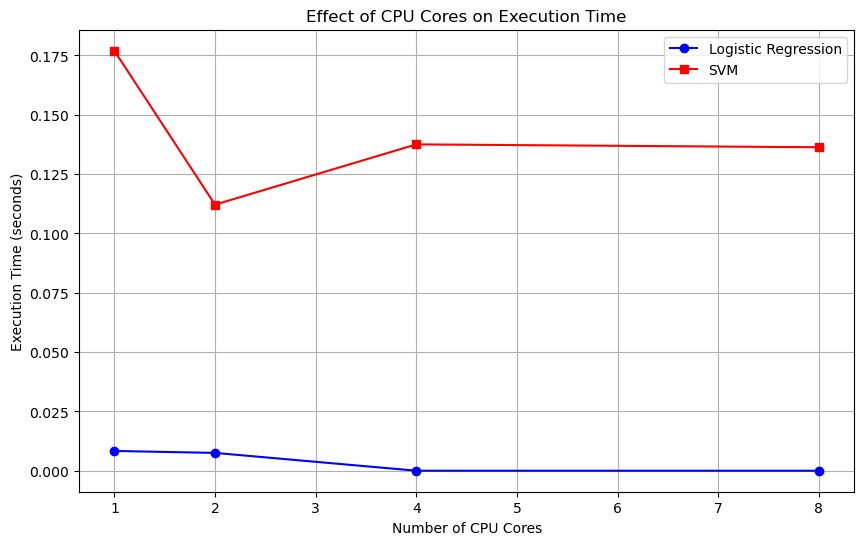

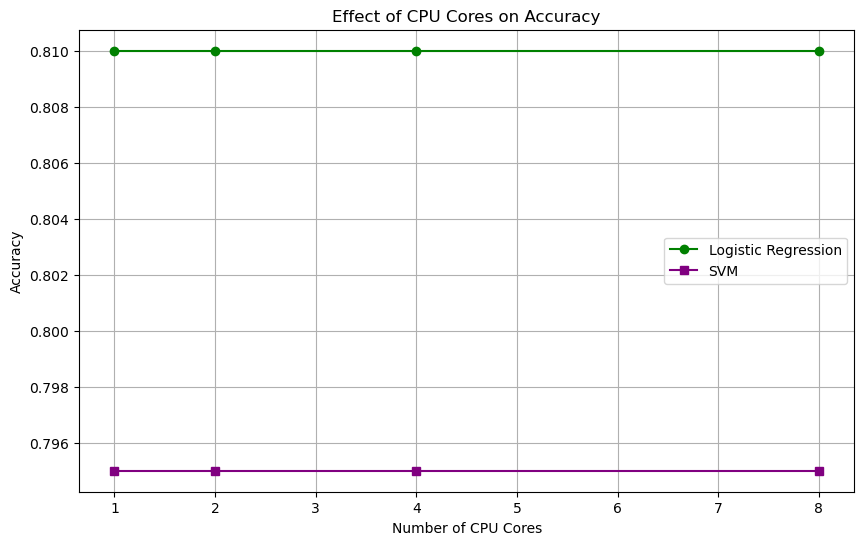


Total number of available CPU cores: 12


In [80]:
# Function to measure execution time of a model fitting function
def measure_execution_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Function to plot and save results
def plot_results(x, y, ylabel, title, labels, filename, markers, colors):
    plt.figure(figsize=(10, 6))
    for i, y_data in enumerate(y):
        plt.plot(x, y_data, marker=markers[i], color=colors[i], label=labels[i])
    plt.xlabel("Number of CPU Cores")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.savefig(filename)
    plt.show()

# Function to perform experiments
def perform_experiment(cpu_core_limits):
    results = {"cores": [], "logistic_time": [], "logistic_accuracy": [],
               "svm_time": [], "svm_accuracy": []}

    # Create synthetic dataset
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Running the experiments
    for cores in cpu_core_limits:
        print(f"\nTesting with {cores} CPU cores...")
        os.environ["OMP_NUM_THREADS"] = str(cores)

        # Logistic Regression
        logistic_model = LogisticRegression(solver='liblinear', random_state=42)
        logistic_time = measure_execution_time(logistic_model.fit, X_train, y_train)
        logistic_accuracy = logistic_model.score(X_test, y_test)
        results["logistic_time"].append(logistic_time)
        results["logistic_accuracy"].append(logistic_accuracy)

        # Support Vector Machine
        svm_model = SVC(kernel='linear', random_state=42)
        svm_time = measure_execution_time(svm_model.fit, X_train, y_train)
        svm_accuracy = svm_model.score(X_test, y_test)
        results["svm_time"].append(svm_time)
        results["svm_accuracy"].append(svm_accuracy)

        results["cores"].append(cores)
        print(f"Logistic Regression - Time: {logistic_time:.4f}s, Accuracy: {logistic_accuracy:.4f}")
        print(f"SVM - Time: {svm_time:.4f}s, Accuracy: {svm_accuracy:.4f}")

    return results

# Define CPU core limits
cpu_core_limits = [1, 2, 4, 8]

# Run the experiment
results = perform_experiment(cpu_core_limits)

# Plotting results
plot_results(
    results["cores"],
    [results["logistic_time"], results["svm_time"]],
    "Execution Time (seconds)",
    "Effect of CPU Cores on Execution Time",
    ["Logistic Regression", "SVM"],
    "execution_time_vs_cores.png",
    markers=['o', 's'],
    colors=['b', 'r']
)

plot_results(
    results["cores"],
    [results["logistic_accuracy"], results["svm_accuracy"]],
    "Accuracy",
    "Effect of CPU Cores on Accuracy",
    ["Logistic Regression", "SVM"],
    "accuracy_vs_cores.png",
    markers=['o', 's'],
    colors=['g', 'purple']
)

# Display CPU information
print(f"\nTotal number of available CPU cores: {psutil.cpu_count(logical=True)}")